In [1]:
import pandas as pd

kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [43]:
kc_houses.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [44]:
kc_houses['waterfront'].unique()

array([nan,  0.,  1.])

In [55]:
kc_houses['condition'].unique()

array([3, 5, 4, 1, 2])

In [45]:
kc_houses['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [46]:
kc_houses['view'].nunique()

5

In [47]:
kc_houses['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [48]:
kc_houses['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Given that the vast majority of lots have a value of 0 for 'yr_renovated' and >10% of the values for 'yr_renovated' are missing, we will replace 'yr_renovated' with a dummy variable 'was_renovated'; all lots that have a year in which they were renovated will be represented with a 1, and all other lots will be represented with 0.

In [2]:
kc_houses['was_renovated']= kc_houses['yr_renovated'].fillna(0)
temp = kc_houses['was_renovated'].astype(bool).astype(int)
kc_houses['was_renovated'] = temp

Roughly 10% of records have a null value for 'waterfront'. Given that a large number of records have a null value for waterfront but we think this information may have a bearing on sale price, it would not be practical to simply drop the rows for which waterfront has a null value. Instead, null values in the waterfront column will be replaced with 0.

In [3]:
kc_houses['waterfront'].fillna(0,inplace=True)

Given that only 63 rows are missing values for 'view', we will simply drop the rows that have a null value for 'view'

In [4]:
no_view = kc_houses['view'].isna()
# no_view.head()
kc_houses.drop(kc_houses[no_view].index,inplace=True)

In [27]:
kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
was_renovated    21534 non-null int64
dtypes: float64(8), int64(12), object

In [28]:
kc_houses['view'].isna().sum()

0

In [33]:
kc_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,17704.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,1971.002275,83.765025,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,0.034504
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,29.376044,400.239690,53.506639,0.138528,0.140735,685.121001,27255.483308,0.182523
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [5]:
kc_houses['living-lot-ratio'] = kc_houses['sqft_living']/kc_houses['sqft_lot']

In [6]:
kc_houses['living-lot-ratio15'] = kc_houses['sqft_living15']/kc_houses['sqft_lot15']

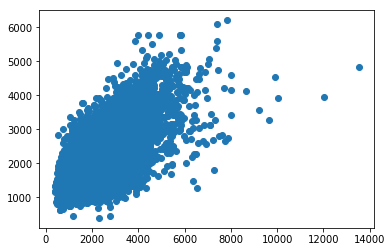

In [9]:
import matplotlib.pyplot as plt
plt.scatter(kc_houses['sqft_living'],kc_houses['sqft_living15'])
plt.show()

In [37]:
kc_houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,living-lot-ratio,living-lot-ratio15
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.004259,0.011592,-0.023944,...,0.021609,-0.011802,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.010481,0.088188,0.099755
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,...,0.054273,0.129887,-0.053620,0.307868,0.022417,0.585304,0.083189,0.117668,0.123050,0.065531
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,...,0.155462,0.018419,-0.153990,-0.010415,0.132318,0.392874,0.030952,0.017531,0.026503,-0.060570
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,...,0.507565,0.050786,-0.204435,0.024487,0.225025,0.569139,0.088854,0.046519,0.286945,0.186403
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,...,0.318217,0.055471,-0.199839,0.052383,0.241856,0.756208,0.184801,0.050640,0.076427,-0.032489
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,...,0.052646,0.004661,-0.129846,-0.085143,0.230137,0.145142,0.717095,0.005203,-0.252470,-0.252465
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,...,0.489410,0.002978,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.003236,0.557130,0.494861
waterfront,-0.004259,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,...,-0.025000,0.081909,0.029490,-0.012282,-0.037845,0.082352,0.030605,0.074657,-0.029894,-0.042551
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,...,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.090465,-0.002310,-0.013922
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,...,-0.361398,-0.061764,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,-0.055304,-0.157109,-0.175018


In [54]:
cond_dummies = pd.get_dummies(kc_houses['condition'])
kc_houses = pd.concat([kc_houses,cond_dummies],axis = 1)

In [66]:
kc_houses=kc_houses.rename(columns={1:'cond_1',2:'cond_2',3:'cond_3',4:'cond_4',5:'cond_5'})

In [67]:
kc_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,was_renovated,living-lot-ratio,living-lot-ratio15,cond_1,cond_2,cond_3,cond_4,cond_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1340,5650,0,0.208850,0.237168,0,0,1,0,0
cond_1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1690,7639,1,0.354874,0.221233,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,2720,8062,0,0.077000,0.337385,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1360,5000,0,0.392000,0.272000,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1800,7503,0,0.207921,0.239904,0,0,1,0,0


In [68]:
kc_houses['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

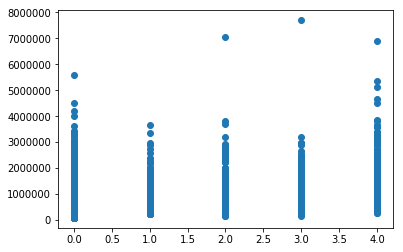

In [69]:
plt.scatter(kc_houses['view'],kc_houses['price'])

In [ ]:
kc_houses['zipcode'].nunique()

In [ ]:
kc_houses.groupby('zipcode')['price'].mean()

In [ ]:
plt.hist(kc_houses['sqft_living15'])

(array([3.000e+00, 5.000e+00, 1.370e+02, 1.381e+03, 5.359e+03, 6.681e+03,
        4.909e+03, 2.433e+03, 5.710e+02, 5.500e+01]),
 array([5.98896142, 6.26345689, 6.53795237, 6.81244784, 7.08694332,
        7.3614388 , 7.63593427, 7.91042975, 8.18492522, 8.4594207 ,
        8.73391617]),
 <a list of 10 Patch objects>)

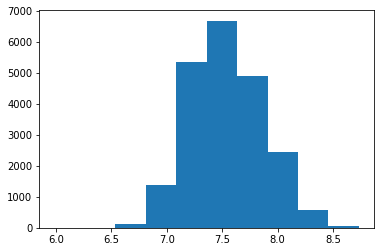

In [10]:
import numpy as np
plt.hist(np.log(kc_houses['sqft_living15']))

In [11]:
kc_houses['log_sqft_liv'] = np.log(kc_houses['sqft_living15'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


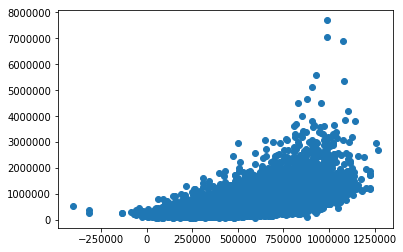

In [13]:
from sklearn.linear_model import LinearRegression as LinReg
house_model = LinReg()
to_model = kc_houses['log_sqft_liv'].as_matrix().reshape(-1,1)
mod = house_model.fit(to_model,kc_houses['price'])
y_pred = mod.predict(to_model)
plt.scatter(y_pred,kc_houses['price'])

In [15]:
from sklearn.metrics import explained_variance_score
explained_variance_score(kc_houses['price'],y_pred)

0.29617686850479386